In [1]:
# Prepare the codes
!git clone https://github.com/phil-bergmann/tracking_wo_bnw

# install packages
!pip install -r tracking_wo_bnw/requirements.txt

# install tracktor
!pip install -e tracking_wo_bnw/.

Cloning into 'tracking_wo_bnw'...
remote: Enumerating objects: 2131, done.
remote: Counting objects: 100% (273/273), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 2131 (delta 158), reused 171 (delta 93), pack-reused 1858
Receiving objects: 100% (2131/2131), 6.22 MiB | 14.61 MiB/s, done.
Resolving deltas: 100% (1343/1343), done.
     |████████████████████████████████| 127 kB 3.9 MB/s 
     |████████████████████████████████| 213 kB 25.0 MB/s 
     |████████████████████████████████| 101 kB 14.6 MB/s 
     |████████████████████████████████| 283 kB 89.1 MB/s 
     |████████████████████████████████| 147 kB 91.0 MB/s 
     |████████████████████████████████| 178 kB 97.4 MB/s 
     |████████████████████████████████| 2.1 MB 66.4 MB/s 
     |████████████████████████████████| 73 kB 2.2 MB/s 
     |████████████████████████████████| 829 kB 68.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
% cd tracking_wo_bnw/

/content/tracking_wo_bnw


### Download MOT 17 Dataset

In [3]:
# Prepare MOT-17Det datasets

%%shell

# download the MOT17 detection challenge
wget https://motchallenge.net/data/MOT17Det.zip .
# extract it in the current folder
unzip -q MOT17Det.zip

--2021-11-28 21:05:49--  https://motchallenge.net/data/MOT17Det.zip
Resolving motchallenge.net (motchallenge.net)... 131.159.19.34, 2a09:80c0:18::1034
Connecting to motchallenge.net (motchallenge.net)|131.159.19.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1952547113 (1.8G) [application/zip]
Saving to: ‘MOT17Det.zip’

MOT17Det.zip        100%[===================>]   1.82G  10.9MB/s    in 3m 2s   

2021-11-28 21:08:52 (10.3 MB/s) - ‘MOT17Det.zip’ saved [1952547113/1952547113]

--2021-11-28 21:08:52--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2021-11-28 21:08:52--
Total wall clock time: 3m 3s
Downloaded: 1 files, 1.8G in 3m 2s (10.3 MB/s)


In [4]:
# Prepare MOT-17 label datasets

%%shell

wget https://motchallenge.net/data/MOT17Labels.zip .
unzip -q -d data/MOT17Labels MOT17Labels.zip
unzip -q -d data/MOT17Det MOT17Det.zip

--2021-11-28 21:09:09--  https://motchallenge.net/data/MOT17Labels.zip
Resolving motchallenge.net (motchallenge.net)... 131.159.19.34, 2a09:80c0:18::1034
Connecting to motchallenge.net (motchallenge.net)|131.159.19.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10107022 (9.6M) [application/zip]
Saving to: ‘MOT17Labels.zip’

MOT17Labels.zip     100%[===================>]   9.64M  3.54MB/s    in 2.7s    

2021-11-28 21:09:13 (3.54 MB/s) - ‘MOT17Labels.zip’ saved [10107022/10107022]

--2021-11-28 21:09:13--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2021-11-28 21:09:13--
Total wall clock time: 4.3s
Downloaded: 1 files, 9.6M in 2.7s (3.54 MB/s)


In [5]:
# Obtain the ground truth and pre-trained model files

%%shell

wget https://vision.in.tum.de/webshare/u/meinhard/tracking_wo_bnw-output_v3.zip .
unzip -q tracking_wo_bnw-output_v3.zip 

--2021-11-28 21:09:30--  https://vision.in.tum.de/webshare/u/meinhard/tracking_wo_bnw-output_v3.zip
Resolving vision.in.tum.de (vision.in.tum.de)... 131.159.19.110, 2a09:80c0:18::1110
Connecting to vision.in.tum.de (vision.in.tum.de)|131.159.19.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 501071552 (478M) [application/zip]
Saving to: ‘tracking_wo_bnw-output_v3.zip’

tracking_wo_bnw-out 100%[===================>] 477.86M  10.8MB/s    in 47s     

2021-11-28 21:10:19 (10.1 MB/s) - ‘tracking_wo_bnw-output_v3.zip’ saved [501071552/501071552]

--2021-11-28 21:10:19--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2021-11-28 21:10:19--
Total wall clock time: 49s
Downloaded: 1 files, 478M in 47s (10.1 MB/s)


Let's have a look at the dataset and how it is layed down.

The data is structured as follows

In [6]:
%%shell

ls
ls train
ls test

ls train/MOT17-02/
ls train/MOT17-02/img1/

data	     MOT17Det.zip     requirements.txt	test
experiments  MOT17Labels.zip  setup.py		tracking_wo_bnw-output_v3.zip
LICENSE      output	      src		train
__MACOSX     README.md	      tensorboard
MOT17-02  MOT17-04  MOT17-05  MOT17-09	MOT17-10  MOT17-11  MOT17-13
MOT17-01  MOT17-03  MOT17-06  MOT17-07	MOT17-08  MOT17-12  MOT17-14
gt  img1  seqinfo.ini
000001.jpg  000101.jpg	000201.jpg  000301.jpg	000401.jpg  000501.jpg
000002.jpg  000102.jpg	000202.jpg  000302.jpg	000402.jpg  000502.jpg
000003.jpg  000103.jpg	000203.jpg  000303.jpg	000403.jpg  000503.jpg
000004.jpg  000104.jpg	000204.jpg  000304.jpg	000404.jpg  000504.jpg
000005.jpg  000105.jpg	000205.jpg  000305.jpg	000405.jpg  000505.jpg
000006.jpg  000106.jpg	000206.jpg  000306.jpg	000406.jpg  000506.jpg
000007.jpg  000107.jpg	000207.jpg  000307.jpg	000407.jpg  000507.jpg
000008.jpg  000108.jpg	000208.jpg  000308.jpg	000408.jpg  000508.jpg
000009.jpg  000109.jpg	000209.jpg  000309.jpg	000409.jpg  000509.jpg
000010.jpg  000110.jpg	0

(5 points) Visualize some images in the MOT-17 dataset. 

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Text(0.5, 1.0, '#6')

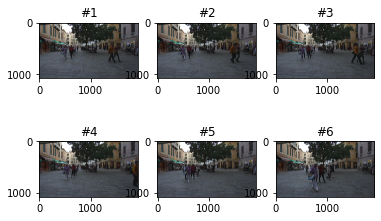

In [8]:
# TODO

img1 = mpimg.imread('/content/tracking_wo_bnw/train/MOT17-02/img1/000001.jpg')
img2 = mpimg.imread('/content/tracking_wo_bnw/train/MOT17-02/img1/000010.jpg')
img3 = mpimg.imread('/content/tracking_wo_bnw/train/MOT17-02/img1/000020.jpg')
img4 = mpimg.imread('/content/tracking_wo_bnw/train/MOT17-02/img1/000050.jpg')
img5 = mpimg.imread('/content/tracking_wo_bnw/train/MOT17-02/img1/000100.jpg')
img6 = mpimg.imread('/content/tracking_wo_bnw/train/MOT17-02/img1/000200.jpg')


fig = plt.figure()
ax = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(img1)
ax.set_title('#1')

ax = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(img2)
ax.set_title('#2')

ax = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(img3)
ax.set_title('#3')

ax = fig.add_subplot(2, 3, 4)
imgplot = plt.imshow(img4)
ax.set_title('#4')

ax = fig.add_subplot(2, 3, 5)
imgplot = plt.imshow(img5)
ax.set_title('#5')

ax = fig.add_subplot(2, 3, 6)
imgplot = plt.imshow(img6)
ax.set_title('#6')


## Download torchvision and coco

First, we need to install `pycocotools`. This library will be used for computing the evaluation metrics following the COCO metric for intersection over union.

In `references/detection/,` we have a number of helper functions to simplify training and evaluating detection models.
Here, we will use `references/detection/engine.py`, `references/detection/utils.py` and `references/detection/transforms.py`.

Let's copy those files (and their dependencies) in here so that they are available in the notebook

In [9]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
%%shell

# Install pycocotools
git clone https://github.com/cocodataset/cocoapi.git
cd cocoapi/PythonAPI
python setup.py build_ext install

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 7.78 MiB/s, done.
Resolving deltas: 100% (576/576), done.
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/tracking_wo_bnw/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g 

In [11]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 58253, done.
remote: Counting objects: 100% (23724/23724), done.
remote: Compressing objects: 100% (3809/3809), done.
remote: Total 58253 (delta 20252), reused 22841 (delta 19692), pack-reused 34529
Receiving objects: 100% (58253/58253), 110.75 MiB | 13.30 MiB/s, done.
Resolving deltas: 100% (46807/46807), done.
Note: checking out 'v0.3.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at be376084 version check against PyTorch's CUDA version


## Defining the Dataset

The [torchvision reference scripts for training object detection, instance segmentation and person keypoint detection](https://github.com/pytorch/vision/tree/v0.3.0/references/detection) allows for easily supporting adding new custom datasets.
The dataset should inherit from the standard `torch.utils.data.Dataset` class, and implement `__len__` and `__getitem__`.

The only specificity that we require is that the dataset `__getitem__` should return:

* image: a PIL Image of size (H, W)
* target: a dict containing the following fields
    * `boxes` (`FloatTensor[N, 4]`): the coordinates of the `N` bounding boxes in `[x0, y0, x1, y1]` format, ranging from `0` to `W` and `0` to `H`
    * `labels` (`Int64Tensor[N]`): the label for each bounding box
    * `image_id` (`Int64Tensor[1]`): an image identifier. It should be unique between all the images in the dataset, and is used during evaluation
    * `area` (`Tensor[N]`): The area of the bounding box. This is used during evaluation with the COCO metric, to separate the metric scores between small, medium and large boxes.
    * `iscrowd` (`UInt8Tensor[N]`): instances with `iscrowd=True` will be ignored during evaluation.
    * (optionally) `masks` (`UInt8Tensor[N, H, W]`): The segmentation masks for each one of the objects
    * (optionally) `keypoints` (`FloatTensor[N, K, 3]`): For each one of the `N` objects, it contains the `K` keypoints in `[x, y, visibility]` format, defining the object. `visibility=0` means that the keypoint is not visible. Note that for data augmentation, the notion of flipping a keypoint is dependent on the data representation, and you should probably adapt `references/detection/transforms.py` for your new keypoint representation

If your model returns the above methods, they will make it work for both training and evaluation, and will use the evaluation scripts from pycocotools.

Additionally, if you want to use aspect ratio grouping during training (so that each batch only contains images with similar aspect ratio), then it is recommended to also implement a `get_height_and_width` method, which returns the height and the width of the image. If this method is not provided, we query all elements of the dataset via `__getitem__` , which loads the image in memory and is slower than if a custom method is provided.


So each image has a corresponding segmentation mask, where each color correspond to a different instance. Let's write a `torch.utils.data.Dataset` class for this dataset.

In [12]:
import configparser
import csv
import os
import os.path as osp
import pickle

from PIL import Image
import numpy as np
import scipy
import torch


class MOT17ObjDetect(torch.utils.data.Dataset):
    """ Data class for the Multiple Object Tracking Dataset
    """

    def __init__(self, root, transforms=None, vis_threshold=0.25):
        self.root = root
        self.transforms = transforms
        self._vis_threshold = vis_threshold
        self._classes = ('background', 'pedestrian')
        self._img_paths = []

        for f in os.listdir(root):
            path = os.path.join(root, f)
            config_file = os.path.join(path, 'seqinfo.ini')

            assert os.path.exists(config_file), \
                'Path does not exist: {}'.format(config_file)

            config = configparser.ConfigParser()
            config.read(config_file)
            seq_len = int(config['Sequence']['seqLength'])
            im_width = int(config['Sequence']['imWidth'])
            im_height = int(config['Sequence']['imHeight'])
            im_ext = config['Sequence']['imExt']
            im_dir = config['Sequence']['imDir']

            _imDir = os.path.join(path, im_dir)

            for i in range(1, seq_len + 1):
                img_path = os.path.join(_imDir, f"{i:06d}{im_ext}")
                assert os.path.exists(img_path), \
                    'Path does not exist: {img_path}'
                # self._img_paths.append((img_path, im_width, im_height))
                self._img_paths.append(img_path)

    @property
    def num_classes(self):
        return len(self._classes)

    def _get_annotation(self, idx):
        """
        """

        if 'test' in self.root:
          
            num_objs = 0
            boxes = torch.zeros((num_objs, 4), dtype=torch.float32)

            return {'boxes': boxes,
                'labels': torch.ones((num_objs,), dtype=torch.int64),
                'image_id': torch.tensor([idx]),
                'area': (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]),
                'iscrowd': torch.zeros((num_objs,), dtype=torch.int64),
                'visibilities': torch.zeros((num_objs), dtype=torch.float32)}
                
        img_path = self._img_paths[idx]
        file_index = int(os.path.basename(img_path).split('.')[0])

        gt_file = os.path.join(os.path.dirname(
            os.path.dirname(img_path)), 'gt', 'gt.txt')

        assert os.path.exists(gt_file), \
            'GT file does not exist: {}'.format(gt_file)

        bounding_boxes = []

        with open(gt_file, "r") as inf:
            reader = csv.reader(inf, delimiter=',')
            for row in reader:
                visibility = float(row[8])
                if int(row[0]) == file_index and int(row[6]) == 1 and int(row[7]) == 1 and visibility >= self._vis_threshold:
                    bb = {}
                    bb['bb_left'] = int(row[2])
                    bb['bb_top'] = int(row[3])
                    bb['bb_width'] = int(row[4])
                    bb['bb_height'] = int(row[5])
                    bb['visibility'] = float(row[8])

                    bounding_boxes.append(bb)

        num_objs = len(bounding_boxes)

        boxes = torch.zeros((num_objs, 4), dtype=torch.float32)
        visibilities = torch.zeros((num_objs), dtype=torch.float32)
        
        for i, bb in enumerate(bounding_boxes):
            # Make pixel indexes 0-based, should already be 0-based (or not)
            x1 = bb['bb_left'] - 1
            y1 = bb['bb_top'] - 1
            # This -1 accounts for the width (width of 1 x1=x2)
            x2 = x1 + bb['bb_width'] - 1
            y2 = y1 + bb['bb_height'] - 1

            boxes[i, 0] = x1
            boxes[i, 1] = y1
            boxes[i, 2] = x2
            boxes[i, 3] = y2
            visibilities[i] = bb['visibility']
            
        return {'boxes': boxes,
                'labels': torch.ones((num_objs,), dtype=torch.int64),
                'image_id': torch.tensor([idx]),
                'area': (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]),
                'iscrowd': torch.zeros((num_objs,), dtype=torch.int64),
                'visibilities': visibilities,}

    def __getitem__(self, idx):
        # load images ad masks
        img_path = self._img_paths[idx]
        # mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")

        target = self._get_annotation(idx)

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self._img_paths)
    
    def write_results_files(self, results, output_dir):
        """Write the detections in the format for MOT17Det sumbission

        all_boxes[image] = N x 5 array of detections in (x1, y1, x2, y2, score)

        Each file contains these lines:
        <frame>, <id>, <bb_left>, <bb_top>, <bb_width>, <bb_height>, <conf>, <x>, <y>, <z>

        Files to sumbit:
        ./MOT17-01.txt
        ./MOT17-02.txt
        ./MOT17-03.txt
        ./MOT17-04.txt
        ./MOT17-05.txt
        ./MOT17-06.txt
        ./MOT17-07.txt
        ./MOT17-08.txt
        ./MOT17-09.txt
        ./MOT17-10.txt
        ./MOT17-11.txt
        ./MOT17-12.txt
        ./MOT17-13.txt
        ./MOT17-14.txt
        """

        #format_str = "{}, -1, {}, {}, {}, {}, {}, -1, -1, -1"

        files = {}
        for image_id, res in results.items():
            path = self._img_paths[image_id]
            img1, name = osp.split(path)
            # get image number out of name
            frame = int(name.split('.')[0])
            # smth like /train/MOT17-09-FRCNN or /train/MOT17-09
            tmp = osp.dirname(img1)
            # get the folder name of the sequence and split it
            tmp = osp.basename(tmp).split('-')
            # Now get the output name of the file
            out = tmp[0]+'-'+tmp[1]+'.txt'
            outfile = osp.join(output_dir, out)

            # check if out in keys and create empty list if not
            if outfile not in files.keys():
                files[outfile] = []

            for box, score in zip(res['boxes'], res['scores']):
                x1 = box[0].item()
                y1 = box[1].item()
                x2 = box[2].item()
                y2 = box[3].item()
                files[outfile].append(
                    [frame, -1, x1, y1, x2 - x1, y2 - y1, score.item(), -1, -1, -1])

        for k, v in files.items():
            with open(k, "w") as of:
                writer = csv.writer(of, delimiter=',')
                for d in v:
                    writer.writerow(d)

    def print_eval(self, results, ovthresh=0.5):
        """Evaluates the detections (not official!!)

        all_boxes[cls][image] = N x 5 array of detections in (x1, y1, x2, y2, score)
        """

        if 'test' in self.root:
            print('No GT data available for evaluation.')
            return
            
        # Lists for tp and fp in the format tp[cls][image]
        tp = [[] for _ in range(len(self._img_paths))]
        fp = [[] for _ in range(len(self._img_paths))]

        npos = 0
        gt = []
        gt_found = []

        for idx in range(len(self._img_paths)):
            annotation = self._get_annotation(idx)
            bbox = annotation['boxes'][annotation['visibilities'].gt(self._vis_threshold)]
            found = np.zeros(bbox.shape[0])
            gt.append(bbox.cpu().numpy())
            gt_found.append(found)

            npos += found.shape[0]

        # Loop through all images
        # for res in results:
        for im_index, (im_gt, found) in enumerate(zip(gt, gt_found)):
            # Loop through dets an mark TPs and FPs
            
            # im_index = res['image_id'].item()
            # im_det = results['boxes']
            # annotation = self._get_annotation(im_index)
            # im_gt = annotation['boxes'][annotation['visibilities'].gt(0.5)].cpu().numpy()
            # found = np.zeros(im_gt.shape[0])
            
            im_det = results[im_index]['boxes'].cpu().numpy()

            im_tp = np.zeros(len(im_det))
            im_fp = np.zeros(len(im_det))
            for i, d in enumerate(im_det):
                ovmax = -np.inf

                if im_gt.size > 0:
                    # compute overlaps
                    # intersection
                    ixmin = np.maximum(im_gt[:, 0], d[0])
                    iymin = np.maximum(im_gt[:, 1], d[1])
                    ixmax = np.minimum(im_gt[:, 2], d[2])
                    iymax = np.minimum(im_gt[:, 3], d[3])
                    iw = np.maximum(ixmax - ixmin + 1., 0.)
                    ih = np.maximum(iymax - iymin + 1., 0.)
                    inters = iw * ih

                    # union
                    uni = ((d[2] - d[0] + 1.) * (d[3] - d[1] + 1.) +
                            (im_gt[:, 2] - im_gt[:, 0] + 1.) *
                            (im_gt[:, 3] - im_gt[:, 1] + 1.) - inters)

                    overlaps = inters / uni
                    ovmax = np.max(overlaps)
                    jmax = np.argmax(overlaps)

                if ovmax > ovthresh:
                    if found[jmax] == 0:
                        im_tp[i] = 1.
                        found[jmax] = 1.
                    else:
                        im_fp[i] = 1.
                else:
                    im_fp[i] = 1.

            tp[im_index] = im_tp
            fp[im_index] = im_fp

        # Flatten out tp and fp into a numpy array
        i = 0
        for im in tp:
            if type(im) != type([]):
                i += im.shape[0]

        tp_flat = np.zeros(i)
        fp_flat = np.zeros(i)

        i = 0
        for tp_im, fp_im in zip(tp, fp):
            if type(tp_im) != type([]):
                s = tp_im.shape[0]
                tp_flat[i:s+i] = tp_im
                fp_flat[i:s+i] = fp_im
                i += s

        tp = np.cumsum(tp_flat)
        fp = np.cumsum(fp_flat)
        rec = tp / float(npos)
        # avoid divide by zero in case the first detection matches a difficult
        # ground truth (probably not needed in my code but doesn't harm if left)
        prec = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
        tmp = np.maximum(tp + fp, np.finfo(np.float64).eps)

        # correct AP calculation
        # first append sentinel values at the end
        mrec = np.concatenate(([0.], rec, [1.]))
        mpre = np.concatenate(([0.], prec, [0.]))

        # compute the precision envelope
        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        # to calculate area under PR curve, look for points
        # where X axis (recall) changes value
        i = np.where(mrec[1:] != mrec[:-1])[0]

        # and sum (\Delta recall) * prec
        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])

        tp, fp, prec, rec, ap = np.max(tp), np.max(fp), prec[-1], np.max(rec), ap
        
        print(f"AP: {ap} Prec: {prec} Rec: {rec} TP: {tp} FP: {fp}")


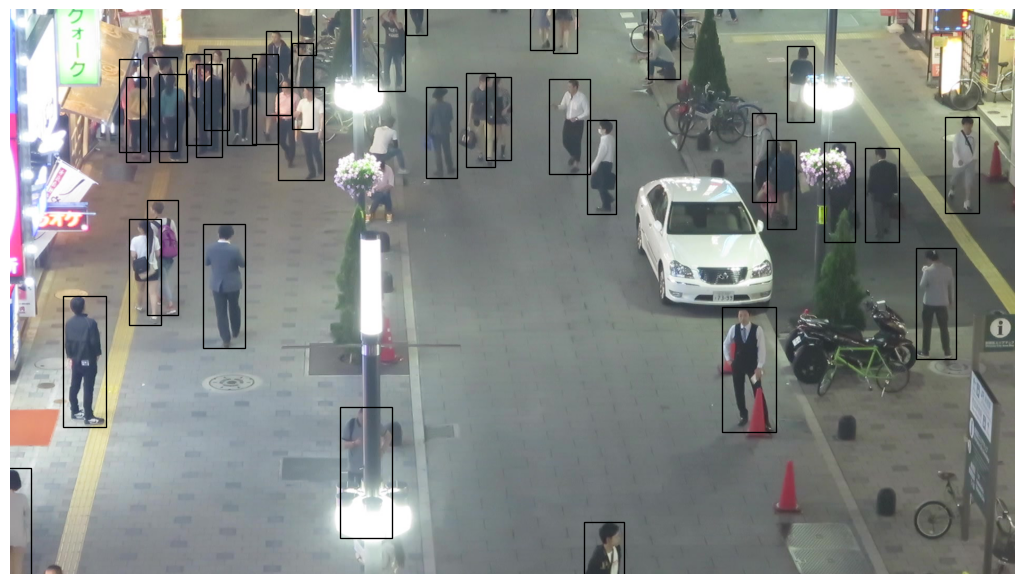

In [13]:
import matplotlib.pyplot as plt
import transforms as T

dataset = MOT17ObjDetect('train')
img, target = dataset[0]

def plot(img, boxes):
  fig, ax = plt.subplots(1, dpi=96)

  img = img.mul(255).permute(1, 2, 0).byte().numpy()
  width, height, _ = img.shape
    
  ax.imshow(img, cmap='gray')
  fig.set_size_inches(width / 80, height / 80)

  for box in boxes:
      rect = plt.Rectangle(
        (box[0], box[1]),
        box[2] - box[0],
        box[3] - box[1],
        fill=False,
        linewidth=1.0)
      ax.add_patch(rect)

  plt.axis('off')
  plt.show()

img, target = T.ToTensor()(img, target)
plot(img, target['boxes'])

That's all for the dataset. Let's see how the outputs are structured for this dataset

In [14]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

      
def get_detection_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    model.roi_heads.nms_thresh = 0.3
    
    return model

DATASETS

In [15]:
from engine import train_one_epoch, evaluate
import utils


def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [16]:
# use our dataset and defined transformations
dataset = MOT17ObjDetect('train', get_transform(train=True))
dataset_no_random = MOT17ObjDetect('train', get_transform(train=False))
dataset_test = MOT17ObjDetect('test', get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
# indices = torch.randperm(len(dataset)).tolist()
# dataset = torch.utils.data.Subset(dataset, indices[:-50])
# dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)
data_loader_no_random = torch.utils.data.DataLoader(
    dataset_no_random, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

INIT MODEL AND OPTIM

In [17]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)
# get the model using our helper function
model = get_detection_model(dataset.num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.00001,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=10,
                                               gamma=0.1)

cuda


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

TRAINING

In [18]:
def evaluate_and_write_result_files(model, data_loader):
  model.eval()
  results = {}
  for imgs, targets in data_loader:
    imgs = [img.to(device) for img in imgs]

    with torch.no_grad():
        preds = model(imgs)
    
    for pred, target in zip(preds, targets):
        results[target['image_id'].item()] = {'boxes': pred['boxes'].cpu(),
                                              'scores': pred['scores'].cpu()}

  data_loader.dataset.print_eval(results)
  data_loader.dataset.write_results_files(results, '/content/gdrive/MyDrive/ColabNotebooks/faster_rcnn_fpn_training_mot_17/resnet50/')
  
# evaluate_and_write_result_files(model, data_loader_test)
# evaluate_and_write_result_files(model, data_loader_no_random)

(5 points) Use the provided pretrained Faster R-CNN to further train the model for 27 epochs on MOT-17 dataset. Use the sample codes to evaluate and report the accuracy of Average Precision (AP) on both train and test set. 


In [19]:
# TODO
num_epochs = 10

for epoch in range(1, num_epochs + 1):
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=200)
    # update the learning rate
    # lr_scheduler.step()
    # evaluate on the test dataset
    if epoch % 3 == 0:
      evaluate_and_write_result_files(model, data_loader_no_random)
      torch.save(model.state_dict(), f"/content/gdrive/MyDrive/ColabNotebooks/faster_rcnn_fpn_training_mot_17/model_epoch_{epoch}.model")

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch: [1]  [   0/2658]  eta: 1:01:35  lr: 0.000010  loss: 1.6574 (1.6574)  loss_classifier: 0.7186 (0.7186)  loss_box_reg: 0.8425 (0.8425)  loss_objectness: 0.0522 (0.0522)  loss_rpn_box_reg: 0.0442 (0.0442)  time: 1.3903  data: 0.5883  max mem: 2507
Epoch: [1]  [ 200/2658]  eta: 0:14:39  lr: 0.000010  loss: 1.2929 (1.3474)  loss_classifier: 0.4171 (0.4923)  loss_box_reg: 0.7216 (0.7154)  loss_objectness: 0.0457 (0.0808)  loss_rpn_box_reg: 0.0533 (0.0589)  time: 0.3514  data: 0.0099  max mem: 2843
Epoch: [1]  [ 400/2658]  eta: 0:13:24  lr: 0.000010  loss: 1.1701 (1.2568)  loss_classifier: 0.3667 (0.4341)  loss_box_reg: 0.7236 (0.6906)  loss_objectness: 0.0524 (0.0740)  loss_rpn_box_reg: 0.0463 (0.0580)  time: 0.3516  data: 0.0100  max mem: 2843
Epoch: [1]  [ 600/2658]  eta: 0:12:11  lr: 0.000010  loss: 0.9647 (1.1971)  loss_classifier: 0.2939 (0.3989)  loss_box_reg: 0.6002 (0.6731)  loss_objectness: 0.0385 (0.0693)  loss_rpn_box_reg: 0.0332 (0.0558)  time: 0.3561  data: 0.0104  max me

KeyboardInterrupt: ignored

(5 points) Randomly select some images and visualize their detection results.  


In [21]:
def evaluate(model, data_loader):
  model.eval()
  results = {}
  for imgs, targets in data_loader:
    imgs = [img.to(device) for img in imgs]

    with torch.no_grad():
        preds = model(imgs)
    
    for pred, target in zip(preds, targets):
        results[target['image_id'].item()] = {'boxes': pred['boxes'].cpu(),
                                              'scores': pred['scores'].cpu()}

  return results

pred_anno = evaluate(model, data_loader_test)

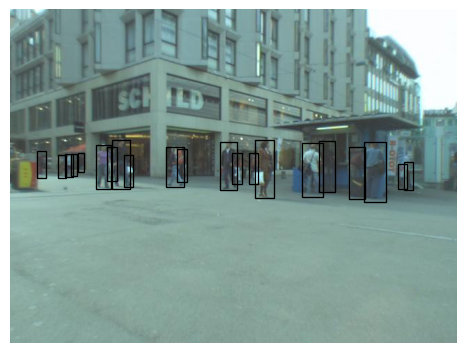

In [22]:
# TODO
from PIL import Image
import matplotlib.pyplot as plt
import random 
##loading img 
testset = MOT17ObjDetect('test')

imgs,target = testset[0]
img,anno = T.ToTensor()(imgs,pred_anno[0])
plot(img, anno['boxes'])

The Tracktor can be configured by changing the corresponding experiments/cfgs/tracktor.yaml config file. The default configurations runs Tracktor with the FPN object detector are almost same as described in the paper except the Re-identification model is turned off (**do_reid=False, load_results=True**). 


(5 points) Run the inference experiments/scripts/test_tracktor.py using the MOT-17 train set input. The tracking results are logged in the corresponding `outputs/ ` folder. Open one of the generated results, explain what are the first six values generated in each line? (i.e., frame_id, bounding box (xywh/xyxy?), confidence, track_id, etc.). Plot the values on the corresponding images and show the video results. 

In [23]:
%%shell

# There are some bugs casued by the previous installation
pip install motmetrics
pip install sacred==0.8.0
pip install PyYAML==5.1.2
pip install lap==0.4.0

  Using cached motmetrics-1.2.0-py3-none-any.whl (151 kB)
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Using cached flake8_import_order-0.18.1-py2.py3-none-any.whl (15 kB)
  Using cached pytest_benchmark-3.4.1-py2.py3-none-any.whl (50 kB)
  Using cached mccabe-0.6.1-py2.py3-none-any.whl (8.6 kB)
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 69 kB 8.0 MB/s 
     |████████████████████████████████| 280 kB 27.7 MB/s 
     |████████████████████████████████| 99 kB 13.9 MB/s 
  Using cached pytest-6.2.4-py3-none-any.whl (280 kB)
     |████████████████████████████████| 280 kB 64.8 MB/s 
     |████████████████████████████████| 280 kB 73.5 MB/s 
     |████████████████████████████████| 279 kB 77.3 MB/s 
     |████████████████████████████████| 279 kB 74.0 MB/s 
     |████████████████████████████████| 272 kB 68.8 MB/s 
     |████████████████████████████████| 272 kB 66.9 MB/s 
     |████████████████████████████████| 272 kB 58.8 MB/s 
   

In [32]:
#install torchreid

% cd /content
!git clone https://github.com/KaiyangZhou/deep-person-reid.git

% cd deep-person-reid
!pip install -r requirements.txt
!python setup.py develop
#download MOT17
% cd /content/tracking_wo_bnw
!wget https://motchallenge.net/data/MOT17.zip
!unzip -q -d data MOT17.zip
#also download the latest output



!wget https://vision.in.tum.de/webshare/u/meinhard/tracking_wo_bnw-output_v5.zip .
!unzip -q tracking_wo_bnw-output_v5.zip 

/content
Cloning into 'deep-person-reid'...
remote: Enumerating objects: 9809, done.
remote: Counting objects: 100% (806/806), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 9809 (delta 741), reused 711 (delta 711), pack-reused 9003
Receiving objects: 100% (9809/9809), 9.50 MiB | 13.97 MiB/s, done.
Resolving deltas: 100% (7284/7284), done.
/content/deep-person-reid
     |████████████████████████████████| 5.8 MB 4.3 MB/s 
     |████████████████████████████████| 185 kB 82.9 MB/s 
  Using cached isort-4.3.21-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 64 kB 3.3 MB/s 
     |████████████████████████████████| 73 kB 2.1 MB/s 
  Using cached pyflakes-2.3.1-py2.py3-none-any.whl (68 kB)
  Using cached pycodestyle-2.7.0-py2.py3-none-any.whl (41 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.2.0
    Uninstalling importlib-metadata-4.2.0:
      Successfully uninstalled importlib-metadata-4.2.0
  Att

In [24]:
!python experiments/scripts/test_tracktor.py

Traceback (most recent call last):
  File "experiments/scripts/test_tracktor.py", line 17, in <module>
    from tracktor.oracle_tracker import OracleTracker
  File "/content/tracking_wo_bnw/src/tracktor/oracle_tracker.py", line 8, in <module>
    from .tracker import Tracker
  File "/content/tracking_wo_bnw/src/tracktor/tracker.py", line 7, in <module>
    from torchreid import metrics
ModuleNotFoundError: No module named 'torchreid'


The results are logged in the corresponding `output` directory.

In [ ]:
# TODO

(5 points) Evaluate the performance using test_tracktor.py and report the following metrics: MOTA, MOTP, IDF1, FP. (**Hints: These metrics have already been logged in Colab outputs from the previous problems. You can just copy down here.**) 

In [ ]:
# TODO

(10 points) Run the inference test_tracktor.py with the changed configurations in experiments/cfgs/tracktor.yaml and evaluate the performance: 

* tracktor/tracker:
    * detection_person_thresh (FRCNN score threshold for detections): 0.5
    * detection_nms_thresh (NMS threshold for detection): 0.3
    * number_of_iterations (maximal number of iterations): 100
    * max_features_num (How much last appearance features are to keep): 10
    * motion_model (motion model settings, mentioned in 2.3): disabled

Feel free to change at least three hyperparameters (can be from detection or tracking). Discuss how these changes may affect the tracking performance based on MOTA. 


In [ ]:
# TODO
!python experiments/scripts/test_tracktor.py